In [2]:
import numpy as np
from scipy.stats import binom
from empiricaldist import Pmf
from utils import decorate

Exercise: Suppose you are giving a talk in a large lecture hall and the fire marshal interrupts because they think the audience exceeds 1200 people, which is the safe capacity of the room.

You think there are fewer then 1200 people, and you offer to prove it. It would take too long to count, so you try an experiment:

    You ask how many people were born on May 11 and two people raise their hands.

    You ask how many were born on May 23 and 1 person raises their hand.

    Finally, you ask how many were born on August 1, and no one raises their hand.

How many people are in the audience? What is the probability that there are more than 1200 people. Hint: Remember the binomial distribution.

In [43]:
hypos = np.arange(3, 2000, 10) # we know a minimum of 3 since 3 people raised there hand
prior = Pmf(1, hypos) # assuming equally likely
prior.normalize()

np.int64(200)

In [44]:
# May 11 had 2 people raise their hand
likelihood1 = binom.pmf(2, hypos, 1/365)


# May 23 had 1 person
likelihood2 = binom.pmf(1, hypos, 1/365)

# August 1 had 0
likelihood3 = binom.pmf(0, hypos, 1/365)

posterior = prior * likelihood1 * likelihood2 * likelihood3
print(posterior.normalize())


0.0067588053373993685


In [45]:
posterior.prob_gt(1200)

np.float64(0.011405597158908808)

In [ ]:
# Not quite sure why this would be considered incorrect -> its actually pretty close to being correct
# its correct, just more calculations.
# # May 11 had 2 people raise their hand
# likelihood = binom.pmf(2, hypos, 1/365)
# prior *= likelihood
# prior.normalize()

# # May 23 had 1 person
# likelihood = binom.pmf(1, hypos, 1/365)
# prior *= likelihood
# prior.normalize()

# # August 1 had 0
# likelihood = binom.pmf(0, hypos, 1/365)
# prior *= likelihood
# print(prior.normalize())

# prior.mean()

0.19834104984990428


np.float64(486.22689163300015)

Exercise: I often see rabbits in the garden behind my house, but it’s not easy to tell them apart, so I don’t really know how many there are.

Suppose I deploy a motion-sensing camera trap that takes a picture of the first rabbit it sees each day. After three days, I compare the pictures and conclude that two of them are the same rabbit and the other is different.

How many rabbits visit my garden?

To answer this question, we have to think about the prior distribution and the likelihood of the data:

    I have sometimes seen four rabbits at the same time, so I know there are at least that many. I would be surprised if there were more than 10. So, at least as a starting place, I think a uniform prior from 4 to 10 is reasonable.

    To keep things simple, let’s assume that all rabbits who visit my garden are equally likely to be caught by the camera trap in a given day. Let’s also assume it is guaranteed that the camera trap gets a picture every day.


In [49]:
hypos = np.arange(4, 11)
prior = Pmf(1, hypos)

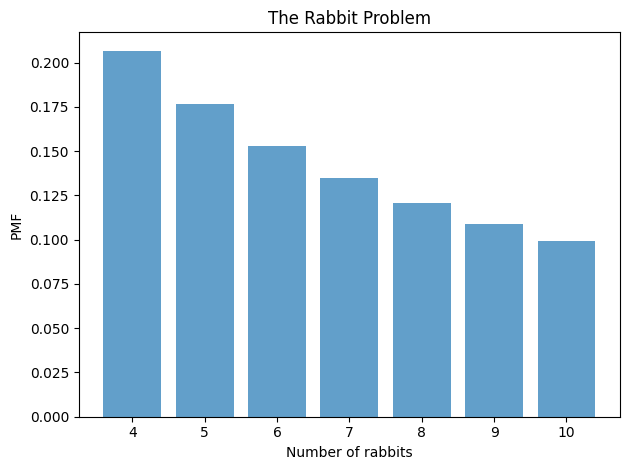

In [ ]:
# This was too simple of an approach
# likelihood1 = 1/hypos**2
# likelihood2 = 1/hypos

N = hypos
# probability the second rabbit is the same as the first
# probability the third rabbit is different
likelihood = 1/N * 1/N * (N-1)

'''
Can think through it like this
Day1: 100% chance of seeing a rabbit -> P = 1
Day2: Must see a rabbit, we saw the same 1 out of N: 1/N and will support the data that we saw the same rabbit
Day3: 1-(seeing the same rabbit) = 1 - 1/N = (N-1)/N
'''

posterior = prior * likelihood
posterior.normalize()
posterior.bar(alpha=0.7)
decorate(xlabel='Number of rabbits',
         ylabel='PMF',
         title='The Rabbit Problem')

In [57]:
posterior.mean()

np.float64(6.509929813748172)

Exercise: Suppose that in the criminal justice system, all prison sentences are either 1, 2, or 3 years, with an equal number of each. One day, you visit a prison and choose a prisoner at random. What is the probability that they are serving a 3-year sentence? What is the average remaining sentence of the prisoners you observe?

In [64]:
hypos = np.arange(1, 4)
prior = Pmf(1/3, hypos)

In [ ]:
# wrong again
# posterior = 1/hypos * prior
# posterior.normalize()

#more likely to see people serving longer sentence -> 
# 3x more likely to see person serving a 3 year sentence compared to 1
# Another way of saying it is, seeing a person is proportional to their sentence

# probability of data given hypothesis = likelihood
likelihood = hypos
posterior = likelihood * prior
posterior.normalize()


np.float64(2.0)

In [68]:
posterior

,probs
1,0.166667
2,0.333333
3,0.500000


In [70]:
# average remaining sentence

# mean of the posterior is the average sentence, divide by 2 to get remaining
posterior.mean() / 2

np.float64(1.1666666666666665)

Exercise: If I chose a random adult in the U.S., what is the probability that they have a sibling? To be precise, what is the probability that their mother has had at least one other child.

This article from the Pew Research Center provides some relevant data.

From it, I extracted the following distribution of family size for mothers in the U.S. who were 40-44 years old in 2014:

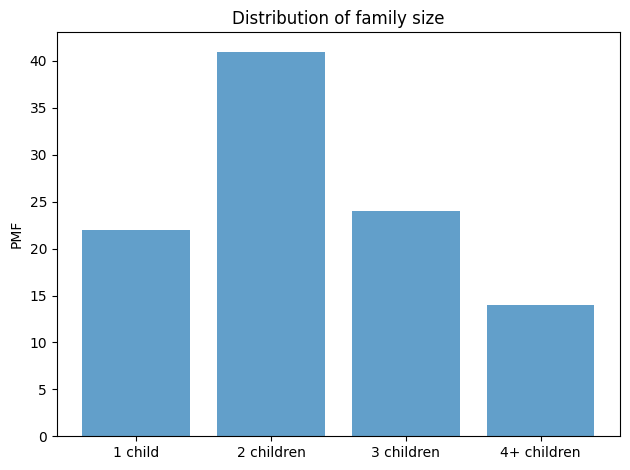

In [71]:
import matplotlib.pyplot as plt

qs = [1, 2, 3, 4]
ps = [22, 41, 24, 14]
prior = Pmf(ps, qs)
prior.bar(alpha=0.7)

plt.xticks(qs, ['1 child', '2 children', '3 children', '4+ children'])
decorate(ylabel='PMF',
         title='Distribution of family size')

For simplicity, let’s assume that all families in the 4+ category have exactly 4 children.

In [ ]:
hypos = np.arange(1, 5) #family size
prior = Pmf([22, 41, 24, 14], hypos)
prior.normalize()


np.int64(101)

In [82]:
# im looking for the sum of probabilities of family size greater than 1

# for the likelihood, choosing a random adult means you are more likely to choose someone from a larger family
# in other words, likelihood is proportional to family size

likelihood = qs
posterior = likelihood * prior
posterior.normalize()
posterior

,probs
1,0.094828
2,0.353448
3,0.310345
4,0.241379


In [83]:
posterior.prob_gt(1) == 1 - posterior[1]

np.True_

Exercise: The Doomsday argument is “a probabilistic argument that claims to predict the number of future members of the human species given an estimate of the total number of humans born so far.”

Suppose there are only two kinds of intelligent civilizations that can happen in the universe. The “short-lived” kind go exinct after only 200 billion individuals are born. The “long-lived” kind survive until 2,000 billion individuals are born. And suppose that the two kinds of civilization are equally likely. Which kind of civilization do you think we live in?

The Doomsday argument says we can use the total number of humans born so far as data. According to the Population Reference Bureau, the total number of people who have ever lived is about 108 billion.

Since you were born quite recently, let’s assume that you are, in fact, human being number 108 billion. If N
is the total number who will ever live and we consider you to be a randomly-chosen person, it is equally likely that you could have been person 1, or

, or any number in between. So what is the probability that you would be number 108 billion?

Given this data and dubious prior, what is the probability that our civilization will be short-lived?

In [87]:
hypos = [200, 2000]
prior = Pmf(1, hypos)

likelihood = 1/prior.qs
posterior = prior * likelihood
posterior.normalize()

np.float64(0.0055)

In [88]:
posterior

,probs
200,0.909091
2000,0.090909
